sample data

reconstruction error

latent space into 2d


In [1]:
import os

import numpy as np

In [2]:
name = 'observation'
from worldmodels.params import home

root = os.path.join(home, 'controller-samples')
rollouts = os.listdir(root)

# for rollout in rollouts:

# for name in names
name = 'observation'
obser = np.load(
    os.path.join(root, '2357136044', '{}.npy'.format(name))
)

name = 'reconstruct'
reconstruct = np.load(
    os.path.join(root, '2357136044', '{}.npy'.format(name))
)

reconstruct = np.squeeze(reconstruct)

In [18]:
from worldmodels.vision.vae import VAE
from worldmodels.params import vae_params

vae_params['load_model'] = True
vae = VAE(**vae_params)

loading model from /Users/adam/world-models-experiments/vae-training/models


{'reconstruction-loss': <tf.Tensor: id=17032, shape=(), dtype=float32, numpy=7.8379097>, 'unclipped-kl-loss': <tf.Tensor: id=17042, shape=(1,), dtype=float32, numpy=array([15.678124], dtype=float32)>, 'kl-loss': <tf.Tensor: id=17046, shape=(), dtype=float32, numpy=16.0>}


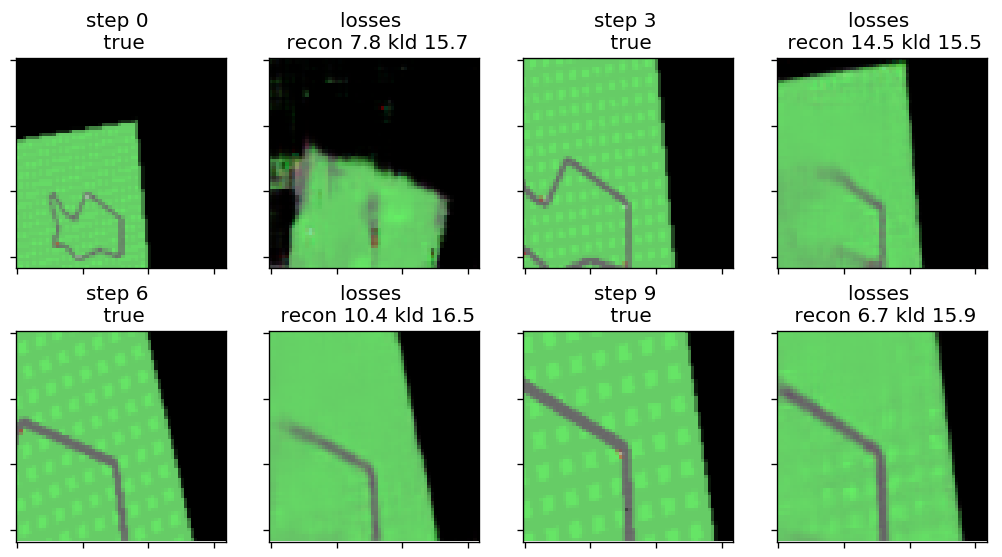

In [43]:
n_sample = 2

import matplotlib.pyplot as plt

dpi = 120
samples = np.linspace(0, obser.shape[0] - 1, 4).astype(int)

base = (256, 128)
scale = 5
f, axes = plt.subplots(int(len(samples) / 2), 4, figsize=(scale*base[0]/dpi, scale*base[1]/dpi), dpi=dpi)

sample = samples[0]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
print(losses)
axes[0, 0].imshow(obs)
axes[0, 1].imshow(reconstruct[sample])
axes[0, 0].set_title('step {} \n true'.format(sample))
axes[0, 1].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'].numpy(), losses['unclipped-kl-loss'].numpy()[0]))

sample = samples[1]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
axes[0, 2].imshow(obs)
axes[0, 3].imshow(reconstruct[sample])
axes[0, 2].set_title('step {} \n true'.format(sample))
axes[0, 3].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'].numpy(), losses['unclipped-kl-loss'].numpy()[0]))

sample = samples[2]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
axes[1, 0].imshow(obs)
axes[1, 1].imshow(reconstruct[sample])
axes[1, 0].set_title('step {} \n true'.format(sample))
axes[1, 1].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'].numpy(), losses['unclipped-kl-loss'].numpy()[0]))

sample = samples[3]
obs = obser[sample]
losses = vae.loss(np.expand_dims(obs, 0))
axes[1, 2].imshow(obs)
axes[1, 3].imshow(reconstruct[sample])
axes[1, 2].set_title('step {} \n true'.format(sample))
axes[1, 3].set_title('losses \n recon {:2.1f} kld {:2.1f}'.format(
    losses['reconstruction-loss'], losses['unclipped-kl-loss'].numpy()[0]))

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.subplots_adjust(wspace=0.1, hspace=0.3)
#f.tight_layout()
f.show()